# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lukman Mul Hakim
- **Email:** serlifa@gmail.com / m184d4ky3143@bangkit.academy
- **ID Dicoding:** serlifa@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan pola perilaku peminjaman Bike Sharing untuk setiap musim ?
- Keadaan cuaca yang bagaimana meningkatkan pengguna Bike Sharing ?
- Pada jam berapa pengguna biasa (casual) meningkat pada hari kerja ?
- Bagaimana peforma peminjaman Bike sharing 2012 jika dibangdingkan dengan 2011 ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('day.csv')
hour_df= pd.read_csv('hour.csv')

### Assessing Data

Menilai dataset day_df

In [9]:
# Menampilkan 10 data pertama
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [78]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Dapat dilihat pada informasi diatas, tabel dataframe terdiri dari 16 columns.
- semua row berjumlah 731 dan tidak ada null.
- tipe data dataframe terdiri dari 4 column float64, 11 column int64, dan 1 column object

In [75]:
# Menjumlahkan semua nan untuk setiap columns
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Menjumlahkan total semua data duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai dataset hour_df

In [8]:
# Menampilkan 10 data pertama
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Dapat dilihat pada informasi diatas, tabel dataframe terdiri dari 17 columns.
- semua row berjumlah 17379 dan tidak ada null.
- tipe data dataframe terdiri dari 4 column float64, 12 column int64, dan 1 column object

In [10]:
# Menjumlahkan semua nan untuk setiap columns
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Menjumlahkan total semua data duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Fixed column 'dteday' data type [object to datetime]

In [4]:
# Mengubah tipe data column "dteday" menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [5]:
# melakukan pemeriksaan tipe data pada column "dteday"
print('day_df["dteday"] : ', day_df["dteday"].dtypes)
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore day_df

In [6]:
# Mematikan peringatan warning
warnings.filterwarnings("ignore")

In [12]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
646,647,2012-10-08,4,1,10,1,1,0,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478
351,352,2011-12-18,4,0,12,0,0,0,1,0.238333,0.245579,0.586250,0.169779,220,2211,2431
118,119,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,4595


In [10]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Jumlah data: 731 entri.
- Musim paling umum: Musim panas (season 2).
- Tahun yang dominan: 2012 (yr = 1).
- Bulan yang paling sering muncul: Juli (mnth 7).
- Hari libur hanya ada sekitar 2.87% dari total hari.
- Hari kerja adalah mayoritas (sekitar 68.40%).
- Cuaca rata-rata pada keadaan yang baik (weathersit 1).
- Suhu rata-rata adalah sekitar 0.50 (41°C), dengan suhu perasaan rata-rata sekitar 0.47 (50°C).
- Kelembaban rata-rata sekitar 0.47 (47%).
- Kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal).
- Jumlah pengguna casual rata-rata sekitar 848.
- Jumlah pengguna terdaftar rata-rata sekitar 3656.
- Total rental rata-rata sekitar 4504 per hari.

In [13]:
# Menampilkan korelasi antara musim dengan total rental pengguna biasa, pengguna terdaftar, dan total rental
day_df[["season", "casual", "registered","cnt"]].corr()

,season,casual,registered,cnt
season,1.000000,0.210399,0.411623,0.406100
casual,0.210399,1.000000,0.395282,0.672804
registered,0.411623,0.395282,1.000000,0.945517
cnt,0.406100,0.672804,0.945517,1.000000


In [14]:
# Menampilkan nilai max, min, mean untuk data rental pengguna casual, registered, dan total keduanya terhadap musim
grouped_day_df = day_df.groupby(by="season").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
}).sort_values(by="cnt", ascending=True)
grouped_day_df.reset_index(inplace=True)
grouped_day_df['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
print(grouped_day_df)

     season  casual  registered      cnt
0  springer   60622      410726   471348
1    winter  129782      711831   841613
2    summer  203522      715067   918589
3      fall  226091      835038  1061129


In [73]:
ask_2_df = day_df.groupby(by="weathersit").agg({
    "cnt":"sum"
}).sort_values(by="cnt", ascending=True)
ask_2_df.reset_index(inplace=True)
ask_2_df['weathersit'] = ask_2_df['weathersit'].astype(str)
print(ask_2_df)

  weathersit      cnt
0          3    37869
1          2   996858
2          1  2257952


In [70]:
# Menghitung total pengguna pada tahun 2011 dan 2012
print("Total pengguna pada tahun 2011 ", day_df[day_df['yr'] == 0].cnt.sum())
print("Total pengguna pada tahun 2012 ", day_df[day_df['yr'] == 1].cnt.sum())

Total pengguna pada tahun 2011  1243103
Total pengguna pada tahun 2012  2049576


### Explore hour_df

In [74]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2203,2204,2011-04-06,2,0,4,16,0,3,1,1,0.54,0.5152,0.28,0.4179,27,142,169
4535,4536,2011-07-12,3,0,7,21,0,2,1,1,0.82,0.7424,0.43,0.1045,49,209,258
12924,12925,2012-06-27,3,1,6,17,0,3,1,1,0.82,0.6970,0.24,0.3881,113,730,843
7955,7956,2011-12-03,4,0,12,3,0,6,0,1,0.24,0.2424,0.70,0.1343,4,5,9
2324,2325,2011-04-11,2,0,4,18,0,1,1,1,0.72,0.6667,0.51,0.3881,93,290,383


In [11]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- Musim (season) 2.50, menunjukkan musim rata-rata.
- Tahun (yr) 0.50, mengindikasikan perbandingan antara tahun 2011 dan 2012.
- Bulan (mnth) 6.54, menunjukkan bulan rata-rata dalam setahun.
- Jam (hr) 11.55, mengindikasikan jam rata-rata dalam sehari.
- Hari libur (holiday) 0.03, persentase hari libur.
- Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
- Hari kerja (workingday) 0.68, persentase hari kerja.
- Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
- Suhu (temp) 0.50, suhu rata-rata yang normal.
- Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
- Kelembaban (hum) 0.48, kelembaban rata-rata.
- Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
- Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
- Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
- Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

In [75]:
hour_df[['workingday', 'casual', 'registered', 'cnt']].corr()

,workingday,casual,registered,cnt
workingday,1.000000,-0.300942,0.134326,0.030284
casual,-0.300942,1.000000,0.506618,0.694564
registered,0.134326,0.506618,1.000000,0.972151
cnt,0.030284,0.694564,0.972151,1.000000


In [18]:
working_hour_df = hour_df[hour_df['workingday'] == 1].groupby(by=["hr"]).agg({
    "casual":["max", 'mean', "sum"],
}).sort_values(by=("casual", "sum"), ascending=False)
print(working_hour_df)

   casual                  
      max       mean    sum
hr                         
17    264  56.895792  28391
18    237  50.451807  25125
16    219  48.344689  24124
15    233  46.333333  23074
14    240  45.869478  22843
13    224  42.568273  21199
12    199  41.358149  20555
19    213  41.022088  20429
11    131  37.598790  18649
20    117  31.369478  15622
10    125  31.205645  15478
21     91  24.610442  12256
9      75  24.312500  12059
8      55  22.264113  11043
22     79  19.572289   9747
23     58  13.379518   6663
7      40  12.195565   6049
0      68   7.149194   3546
6      19   4.318548   2142
1      41   3.710526   1833
2      17   2.137577   1041
5      10   1.270707    629
3      17   0.910638    428
4      11   0.765957    360


In [71]:
print(
    "Pelanggan terbanyak saat hari kerja pada jam : ",
    working_hour_df[ working_hour_df['casual']['max'] == max(working_hour_df['casual']["max"]) ].index.values
)
print(
    "Rata-rata Pelanggan terbanyak saat hari kerja pada jam : ",
    working_hour_df[ working_hour_df['casual']['mean'] == max(working_hour_df['casual']["mean"]) ].index.values
)
print(
    "Total Pelanggan terbanyak saat hari kerja pada jam : ",
    working_hour_df[ working_hour_df['casual']['sum'] == max(working_hour_df['casual']["sum"]) ].index.values
)

Pelanggan terbanyak saat hari kerja pada jam :  [17]
Rata-rata Pelanggan terbanyak saat hari kerja pada jam :  [17]
Total Pelanggan terbanyak saat hari kerja pada jam :  [17]


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan pola perilaku peminjaman Bike Sharing untuk setiap musim ?

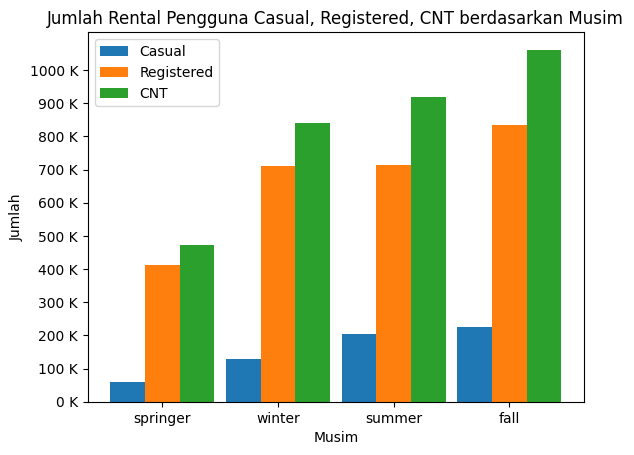

In [69]:
# Menampilkan nilai max, min, mean untuk data rental pengguna casual, registered, dan total keduanya terhadap musim
x_axis = np.arange(len(grouped_day_df['season']))
width = 0.3
y_range = 100000
y_max = (max(grouped_day_df['cnt']) // y_range +1) * y_range

plt.bar(x_axis - width, grouped_day_df['casual'], width=width, label="Casual")
plt.bar(x_axis, grouped_day_df['registered'],  width=width, label="Registered")
plt.bar(x_axis + width, grouped_day_df['cnt'],  width=width, label="CNT")

plt.xticks(x_axis, grouped_day_df['season'])
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.title('Jumlah Rental Pengguna Casual, Registered, CNT berdasarkan Musim')
plt.yticks(
    np.arange(
        0,
        y_max,
        y_range
    ),
    ['{} K'.format(int(y_val / 1000)) for y_val in np.arange(0, y_max, y_range)]
)
plt.xticks(rotation=0)
plt.legend()
plt.show()

Infomasi:
1:springer : musim semi,
2:summer : musim panas,
3:fall : musim gugur,
4:winter: musim dingin

- kasual: jumlah pengguna kasual
- terdaftar: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewakan termasuk yang kasual dan terdaftar

Insight:
- musim semi menjadi jumlah pengguna paling rendah
- musim gugur menjadi jumlah pengguna paling tinggi
- jumlah pengguna pada winter dan summer tidak berbeda jauh
- jumlah pengguna registered pada winter dan summer hampir sama, tetapi berbeda pada pengguna casual ada peningkatan yang cukup signifikan


### Pertanyaan 2: Keadaan cuaca yang bagaimana meningkatkan pengguna Bike Sharing ?

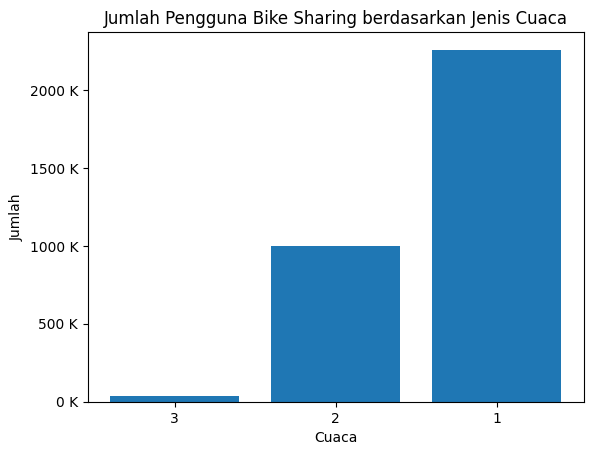

In [72]:
ask_2_df = day_df.groupby(by="weathersit").agg({
    "cnt":"sum"
}).sort_values(by="cnt", ascending=True)
ask_2_df.reset_index(inplace=True)
ask_2_df['weathersit'] = ask_2_df['weathersit'].astype(str)

y_range = 500000
y_max = (max(ask_2_df['cnt']) // y_range +1) * y_range

plt.bar(ask_2_df['weathersit'], ask_2_df['cnt'])
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.title('Jumlah Pengguna Bike Sharing berdasarkan Jenis Cuaca')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.yticks(
    np.arange(
        0,
        y_max,
        y_range
    ),
    ['{} K'.format(int(y_val / 1000)) for y_val in np.arange(0, y_max, y_range)]
)
plt.show()

Kategori Cuaca :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Insight:

Dapat dilihat dari grafik pada cuaca kategori 1 sangat sedikit pengguna pada saat cuaca tersebut, berbeda jauh dari cuaca kategori 1 dan 2. Jumlah pengguna rental bike sharing terbanyak ada pada cuaca kategori 1.

### Pertanyaan 3: Pada jam berapa pengguna biasa (casual) meningkat pada hari kerja ?

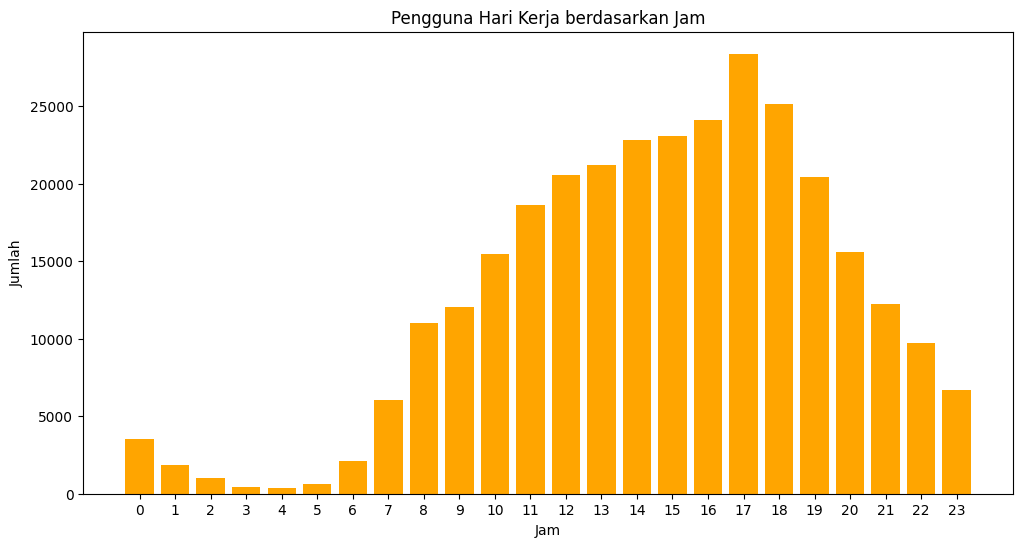

In [80]:
# Membuat bar chart Pengguna Rental saat Hari Kerja untuk Setiap Jam
working_hour_df = hour_df[hour_df['workingday'] == 1].groupby(by=["hr"]).agg({
    "casual":["max", 'mean', "sum"],
}).sort_values(by=("casual", "sum"), ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(working_hour_df.index.values, working_hour_df['casual']['sum'], color='orange')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Pengguna Hari Kerja berdasarkan Jam')
plt.xticks(
    np.arange(0, len(working_hour_df.index.values), 1)
)

plt.show()

Insight:

Dari grafik diatas dapat disimpulkan pengguna pada hari kerja akan meningkat secara signifikan dari jam 5 dan mencapai puncaknya pada jam 17, lalu akan turun lagi secara signifikan pada jam-jam berikutnya. Jam 17 merupakan saat paling banyak pengguna Bike Sharing.

### Pertanyaan 4: Bagaimana peforma peminjaman Bike sharing 2012 jika dibangdingkan dengan 2011 ?

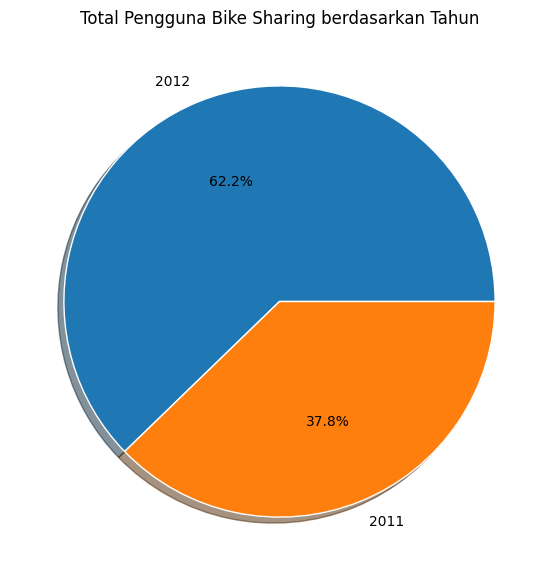

In [77]:
# Membuat Visualisasi Pie Chart untuk Membandingkan Jumlah Pengguna Bike Sharing Tahun 2011 dan 2012
fig = plt.figure(figsize=(10, 7))
plt.pie(
    [day_df[day_df['yr'] == 1].cnt.sum(), day_df[day_df['yr'] == 0].cnt.sum()],
    labels=[2012,2011],
    shadow = True,
    autopct='%1.1f%%',
     wedgeprops= {
         "edgecolor":"white",
         'linewidth': 1,
         'antialiased': True
     }
)
plt.title("Total Pengguna Bike Sharing berdasarkan Tahun")
plt.show()

Insight:

Dari pie chart diatas dapat disimpulkan peningkatan jumlah pengguna bike sharing tahun 2012 jauh meningkat dari tahun 2011

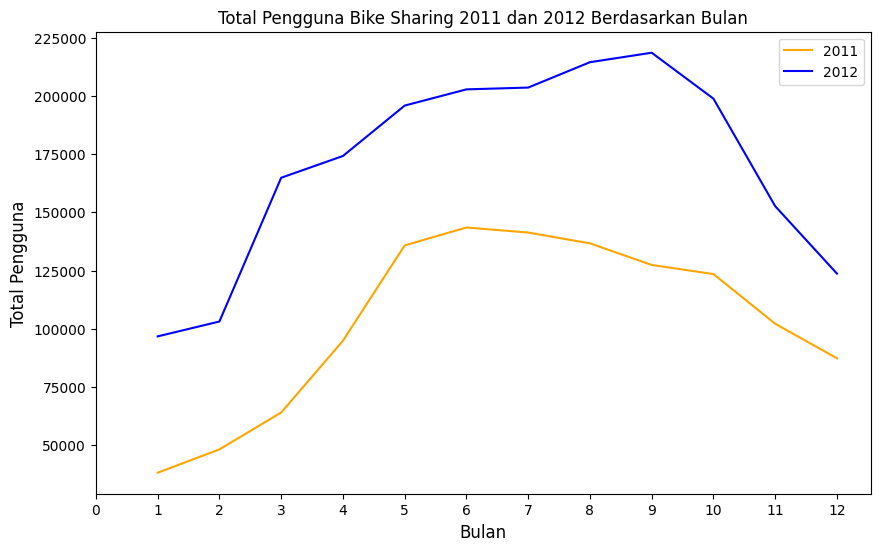

In [63]:
year_day_df = day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt":"sum",
})
plt.figure(figsize=(10, 6))
plt.plot(year_day_df.loc[0]['cnt'].index.values, year_day_df.loc[0]["cnt"], color='orange', label="2011")
plt.plot(year_day_df.loc[1]['cnt'].index.values, year_day_df.loc[1]["cnt"], color='blue', label="2012")
plt.xlabel('Bulan',size=12)
plt.ylabel('Total Pengguna',size=12)
plt.xticks(
    np.arange(0, len(year_day_df.loc[1]['cnt'].index.values) + 1, 1)
)
plt.title("Total Pengguna Bike Sharing 2011 dan 2012 Berdasarkan Bulan")
plt.legend()
plt.show()

Insight:

Dari grafik garis diatas kita dapat melihat peningkatan signifikan jumlah pengguna bike sharing 2012 yang dibandingkan pada 2011, jumlah pengguna setiap bulan 2012 meningkat jauh dari pengguna setiap bulan pada 2011.

## Conclusion

- Faktor musim mempengaruhi secara signifikan jumlah pengguna rental Bike Sharing akan naik atau turun tergantung musimnya

- Cuaca kategori 3 memiliki total pengguna paling sedikit dan berbeda jauh dari cuaca ketegori 1 dan 2, sedangkan total pengguna paling banyak pada cuaca kategori 1

- Pengguna pada hari kerja akan meningkat secara signifikan dari jam 5 dan mencapai puncaknya pada jam 17, lalu akan turun lagi secara signifikan pada jam-jam berikutnya

- Jumlah pengguna rental Bike Sharing tahun 2012 meningkat jauh dari tahun 2011 dan meningkat juga untuk jumlah pengguna setiap bulannya.